**Hello lovely TF grading my PSET!** I apologize for the warning labels for the latter models. I tried everything under the sun to remove the warning labels but to no avail. I hope you understand :)

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [3]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [78]:
# Load in the data

x_train = pd.read_csv("data/X_train.csv")
x_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")


In [79]:
x_train.head()
# y_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,...,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,...,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,...,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,...,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [80]:
x_test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,2,9070,1,1,164.0,1,38,38,...,0,0,6,7,6,14.857143,0,9.4,-0.8,-3.12
1,1,17,3,9147,1,1,120.0,1,19,19,...,0,0,5,11,3,10.857143,0,10.8,1.4,1.74
2,1,17,6,9500,1,1,143.0,1,38,1,...,0,0,8,11,7,12.118750,0,11.1,0.6,2.02
3,1,1,2,9238,1,1,121.0,1,19,19,...,0,0,6,7,6,11.833333,0,8.9,1.4,3.51
4,1,16,1,171,1,1,150.0,1,37,37,...,0,0,0,0,0,0.000000,0,7.6,2.6,0.32


In [81]:
#check for missing values 
x_train.isnull().values.any()

np.False_

In [82]:
x_test.isnull().values.any()

np.False_

In [83]:
#I ought to scale the quantative features, and do one hot encoding 
#for the categorical before anything

quant_list = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)',
              'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
              'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
              'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
              'Curricular units 2nd sem (without evaluations)',
              'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment', 'Admission grade',
              'Previous qualification (grade)', 'Application order', 'Curricular units 1st sem (approved)',
              'Curricular units 2nd sem (approved)'
             ]

scaler = StandardScaler()
x_train[quant_list] = scaler.fit_transform(x_train[quant_list])




In [84]:
x_test[quant_list] = scaler.fit_transform(x_test[quant_list])

In [85]:
x_train.shape

(3318, 36)

In [86]:
x_test.shape

(1106, 36)

In [87]:
x_train[quant_list].columns

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Age at enrollment', 'Admission grade',
       'Previous qualification (grade)', 'Application order',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)'],
      dtype='object')

In [88]:
# Calculate the covariance matrix
cov_matrix = x_train[quant_list].cov()
cov_matrix

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment,Admission grade,Previous qualification (grade),Application order,Curricular units 1st sem (approved),Curricular units 2nd sem (approved)
Curricular units 1st sem (credited),1.000301,0.771918,0.539891,0.122551,0.109478,0.950483,0.641167,0.421559,0.485166,0.134398,0.055763,0.013991,0.015985,-0.021660,0.236008,0.040825,-0.011811,-0.135931,0.623649,0.485166
Curricular units 1st sem (enrolled),0.771918,1.000301,0.678724,0.381773,0.119215,0.753680,0.943230,0.598168,0.672497,0.365295,0.071449,0.042320,0.039999,-0.018865,0.153540,-0.037109,-0.027289,-0.023474,0.768009,0.672497
Curricular units 1st sem (evaluations),0.539891,0.678724,1.000301,0.419606,0.233570,0.524588,0.614367,0.774151,0.439953,0.349999,0.143892,0.066275,-0.010386,-0.093570,0.141962,-0.072480,-0.062498,-0.096029,0.516128,0.439953
Curricular units 1st sem (grade),0.122551,0.381773,0.419606,1.000301,-0.064057,0.113213,0.413257,0.489681,0.675363,0.836079,-0.049146,0.016623,-0.029297,0.053870,-0.153519,0.068401,0.056962,0.059793,0.700282,0.675363
Curricular units 1st sem (without evaluations),0.109478,0.119215,0.233570,-0.064057,1.000301,0.111896,0.100056,0.140478,-0.015205,-0.058181,0.582992,-0.050101,-0.057677,-0.153011,0.060265,0.020327,0.013150,-0.042121,-0.020932,-0.015205
Curricular units 2nd sem (credited),0.950483,0.753680,0.524588,0.113213,0.111896,1.000301,0.669929,0.427516,0.512550,0.132053,0.072383,0.020010,0.009022,-0.029016,0.226520,0.037807,-0.024995,-0.130717,0.605749,0.512550
Curricular units 2nd sem (enrolled),0.641167,0.943230,0.614367,0.413257,0.100056,0.669929,1.000301,0.606115,0.701823,0.399804,0.068911,0.069184,0.020451,-0.003758,0.102337,-0.046706,-0.024847,0.022405,0.734787,0.701823
Curricular units 2nd sem (evaluations),0.421559,0.598168,0.774151,0.489681,0.140478,0.427516,0.606115,1.000301,0.459530,0.448065,0.157765,0.047977,-0.016878,0.002767,0.066547,-0.063471,-0.050490,-0.063018,0.537688,0.459530
Curricular units 2nd sem (approved),0.485166,0.672497,0.439953,0.675363,-0.015205,0.512550,0.701823,0.459530,1.000301,0.765984,-0.051063,0.052205,-0.027598,0.018499,-0.104567,0.072097,0.046796,0.082428,0.904571,1.000301
Curricular units 2nd sem (grade),0.134398,0.365295,0.349999,0.836079,-0.058181,0.132053,0.399804,0.448065,0.765984,1.000301,-0.062544,-0.000021,-0.032955,0.068418,-0.174717,0.071487,0.060241,0.060947,0.689636,0.765984


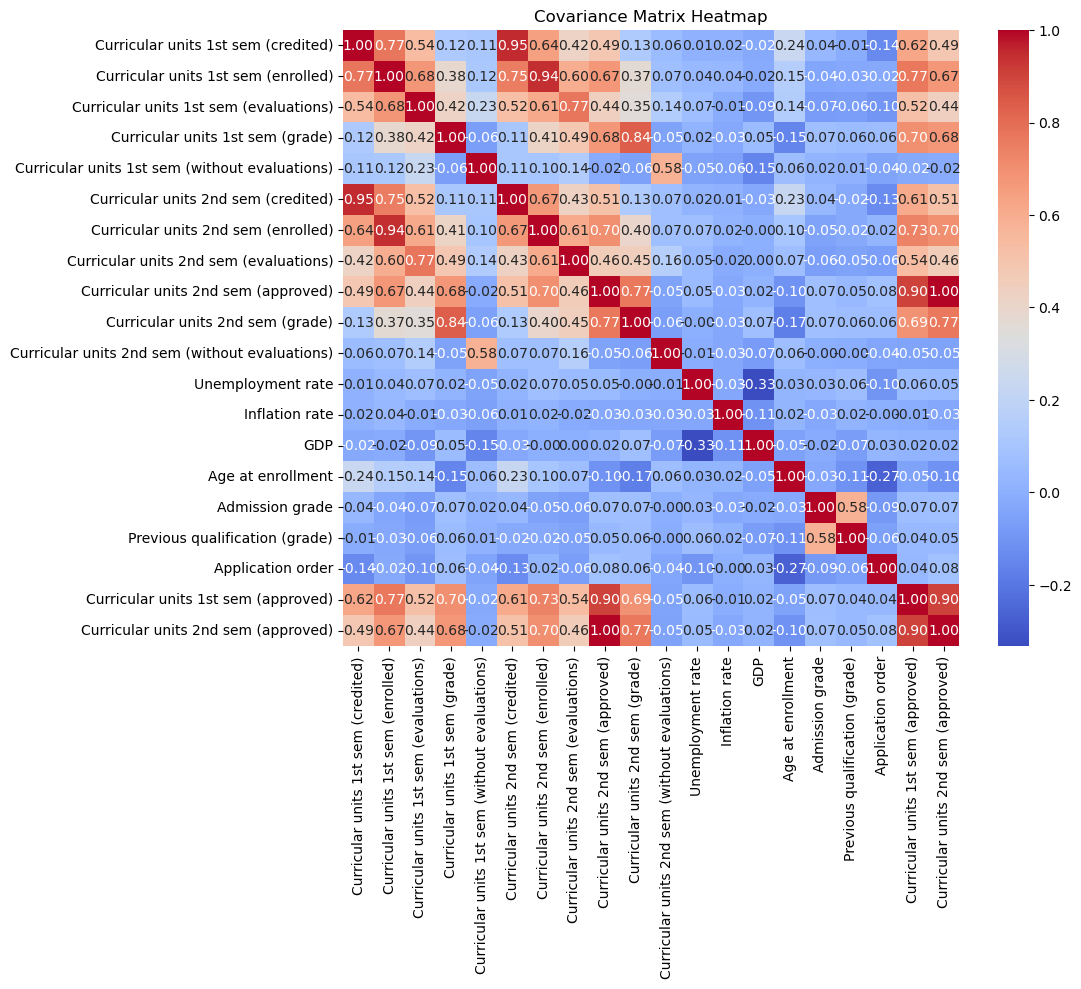

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Covariance Matrix Heatmap")
plt.show()

**Extreme highly correlated features (> 0.8)**
Curricular units 2nd sem(credited) and curricular units 1st sem(credited)
Curricular units 2nd sem(enrolled) and curricular units 1st sem(enrolled)
Curricular units 2nd sem(grade) and curricular units 1st sem(grade)

**Highly correlated features (> 0.5)**
Most of the curricular units 1st and 2nd sem features no matter if credited/enrolled/grade with each other. 

I think the variables to watch out for with multicollinearity will be the extreme highly correlated features. 


In [90]:
x_train.shape
#37 features, so I can do 9 by 4 

(3318, 36)

In [91]:
y_train.head()

,Target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout


**Next I plot the correlation between the features themselves and the response variable. I will use density on the y axis to handle the class imbalance.**

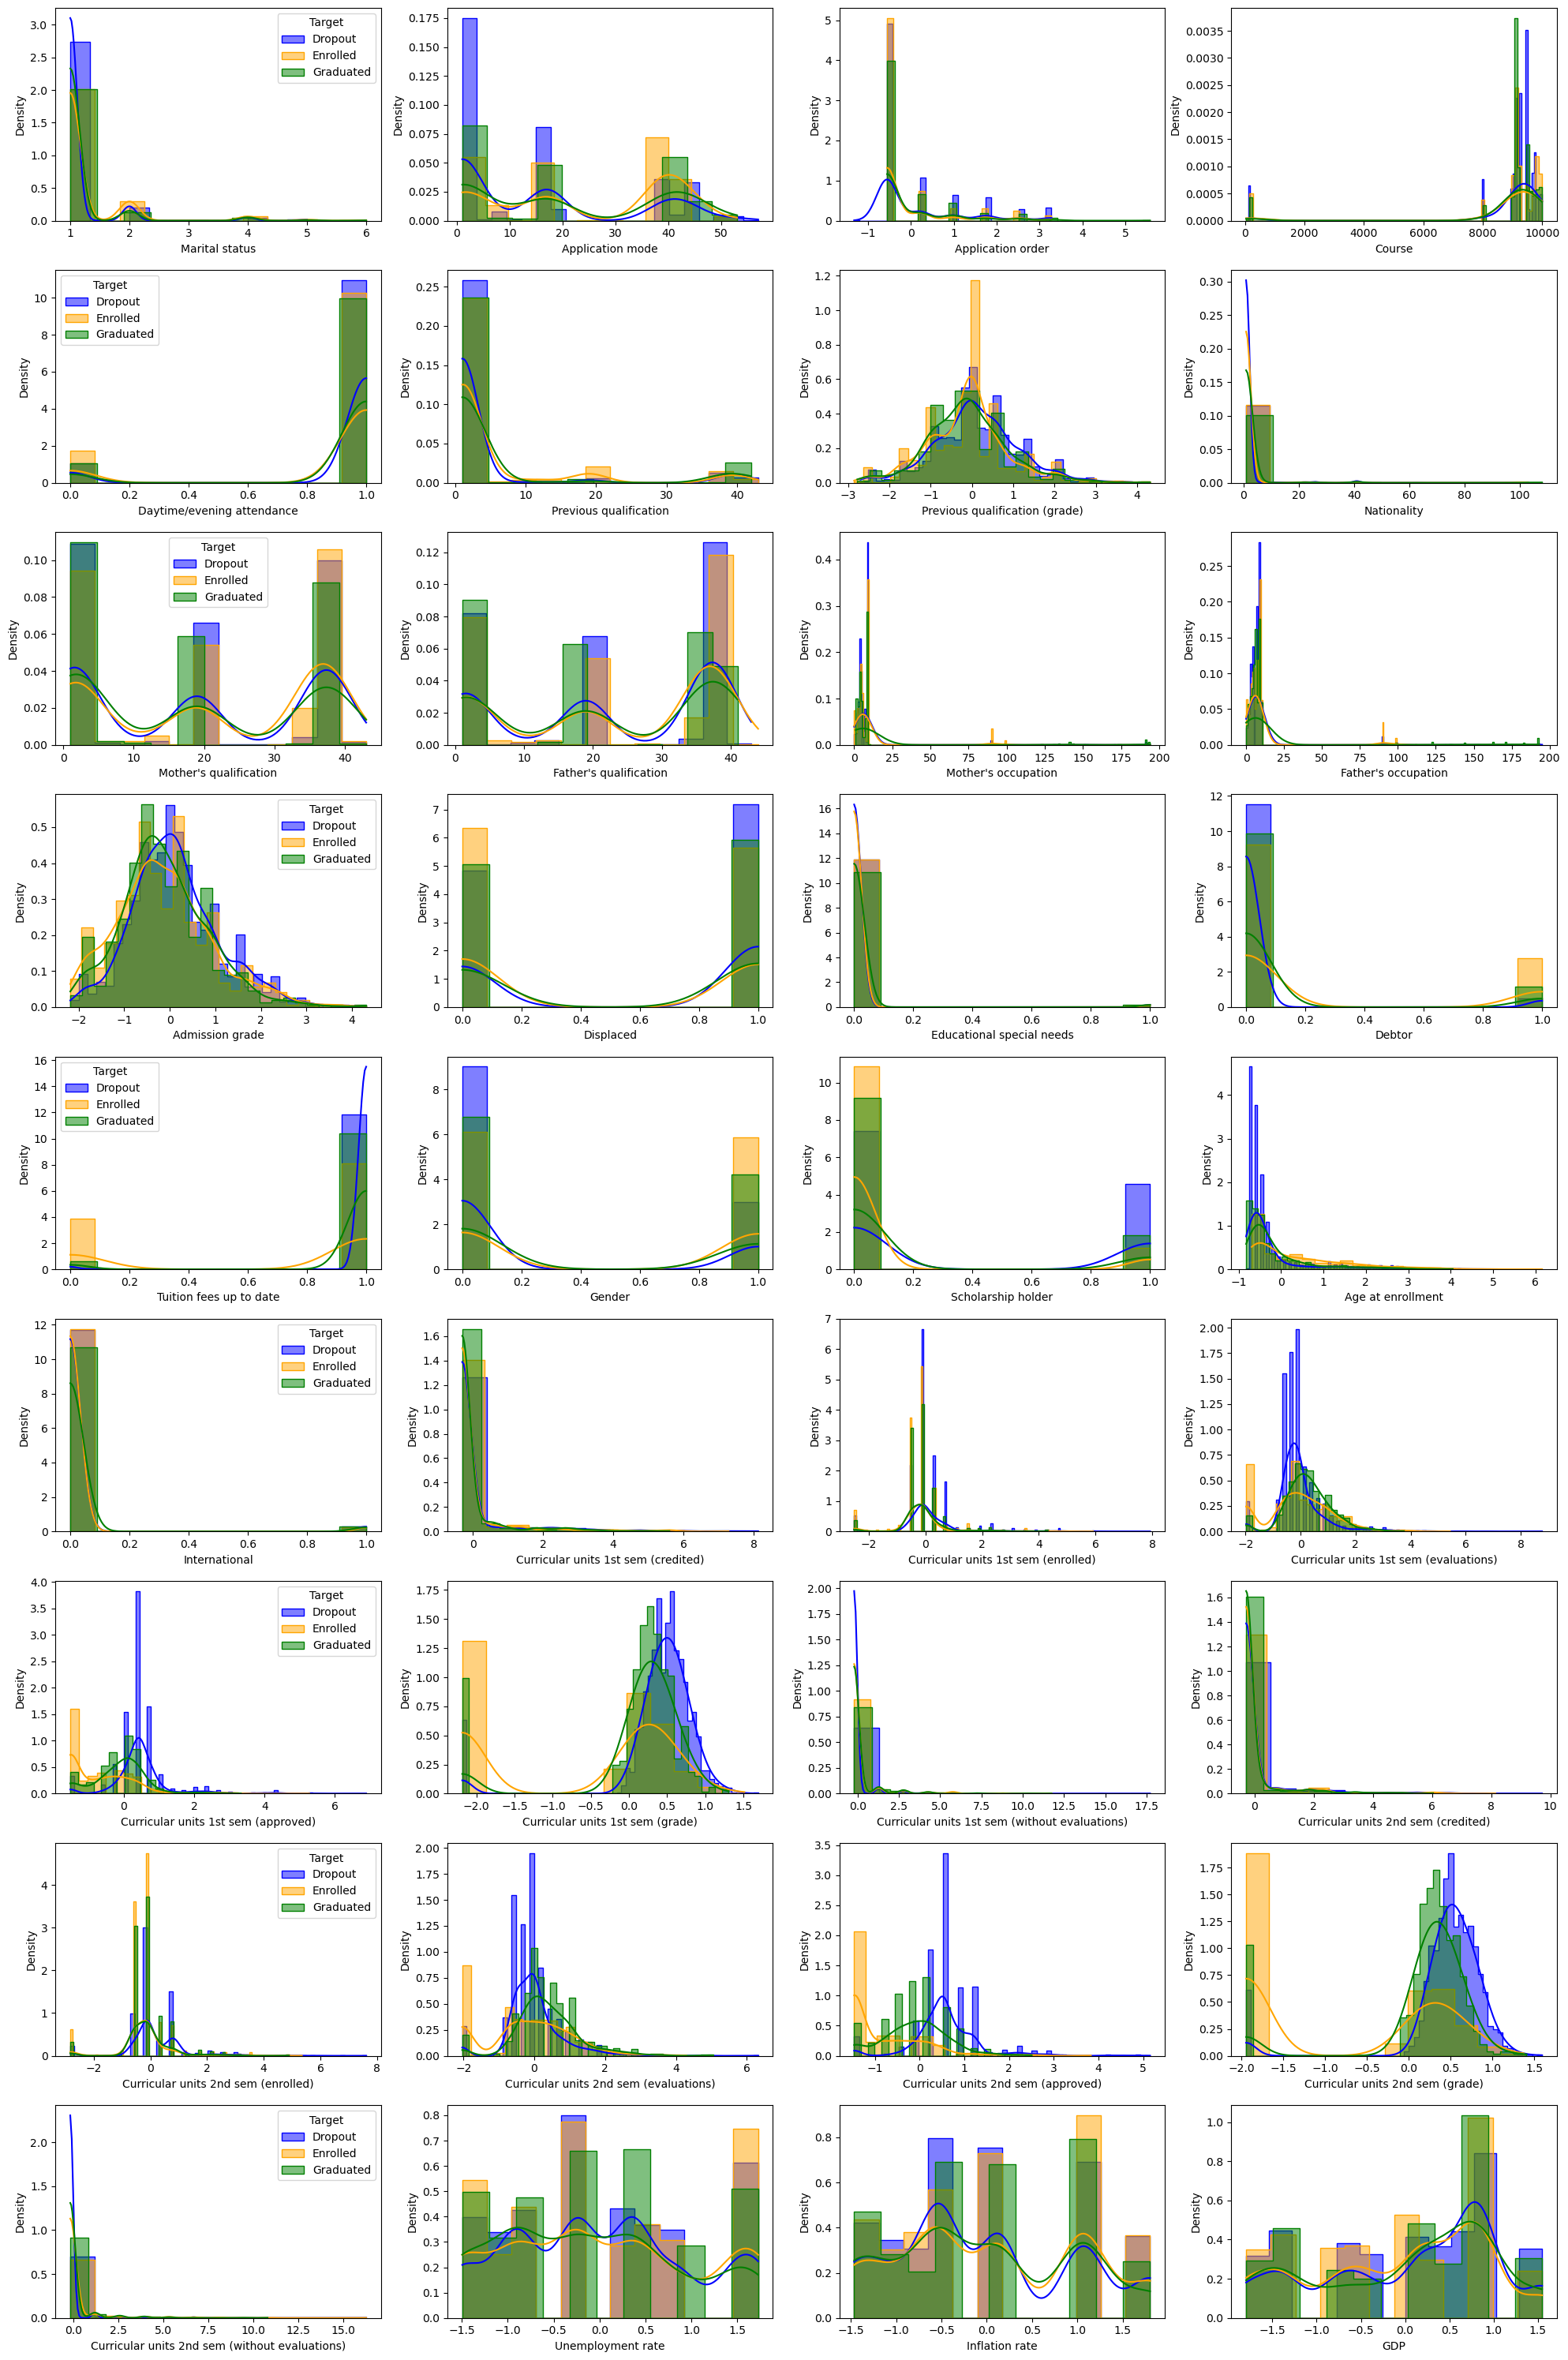

In [92]:
x_train['target'] = y_train  # Assuming y_train has the target values 0, 1, 2

# Split x_train into separate DataFrames based on the target value
x_train_0 = x_train[x_train['target'] == "Graduate"]
x_train_1 = x_train[x_train['target'] == "Dropout"]
x_train_2 = x_train[x_train['target'] == "Enrolled"]

# List of all features in x_train (excluding the target column)
features = [col for col in x_train.columns if col != 'target']

# Define the grid size for subplots (e.g., 9 rows x 4 columns)
rows = 9
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))  # Adjust figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a density histogram for each target class
for i, feature in enumerate(features):
    # Plot density histograms for each target class in the same subplot
    sns.histplot(x=x_train_0[feature], stat="density", color="blue", label="Dropout", kde=True, ax=axes[i], element="step")
    sns.histplot(x=x_train_1[feature], stat="density", color="orange", label="Enrolled", kde=True, ax=axes[i], element="step")
    sns.histplot(x=x_train_2[feature], stat="density", color="green", label="Graduated", kde=True, ax=axes[i], element="step")

    # Set labels and titles
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    
    # Add legend only once per subplot
    if i % cols == 0:
        axes[i].legend(title="Target")

# Hide any empty subplots if there are more subplots than features
for i in range(len(features), len(axes)):
    axes[i].axis('off')

# Adjust layout to add spacing
plt.tight_layout()
plt.show()

# Optional: Drop the 'target' column from x_train after plotting
x_train.drop(columns='target', inplace=True)

**Significant predictors:**

Application mode looks significant. There is a big discrepancy between the response values (dropout has a much higher density in application mode = 0 than the other college outcomes). 

Course looks significant. There is a discrepancy in density for the latter end course values (for instance, near 10000, the dropout density is much greater than the other two outcome densities)

Age at enrollment looks significant . We see that dropouts have a much higher density of  lower values of age at enrollment than the other two outcomes. 

Curricular units 1st sem evaluations seems significant because dropouts have a much higher density between values -1 and 0 than the other two outcomes. 


In [93]:
#Curricular units 1st sem(grade) seems positively correlated with the response (


#Binary/Non-Ordinal Variables
#All of the other variables are binary or non-ordinal or both

cat_columns = [col for col in x_train.columns if col not in quant_list]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown = 'ignore')

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(x_train[cat_columns])

# Convert encoded data to a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_columns), index=x_train.index)

# Drop the original categorical columns and concatenate the new one-hot encoded DataFrame
x_train = pd.concat([x_train.drop(columns=cat_columns), encoded_df], axis=1)

In [94]:
cat_columns2 = [col for col in x_test.columns if col not in quant_list]

# Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_data2 = encoder.transform(x_test[cat_columns])

# Convert encoded data to a DataFrame with proper column names
encoded_df2 = pd.DataFrame(encoded_data2, columns=encoder.get_feature_names_out(cat_columns2), index=x_test.index)

# Drop the original categorical columns and concatenate the new one-hot encoded DataFrame
x_test = pd.concat([x_test.drop(columns=cat_columns), encoded_df2], axis=1)

/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [95]:
x_test.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,0.197331,2.463804,2.757637,-0.702613,-0.298712,-0.113118,-0.322471,0.413915,0.735354,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.942205,-0.922797,-0.828514,-0.702613,-0.298712,-0.520636,-0.081977,-0.553929,-0.068517,-0.18061,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.176826,0.847471,0.012770,-0.702613,-0.298712,0.294401,-0.081977,0.736530,0.326528,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.197331,-0.845829,-0.557592,-0.438117,-0.298712,-0.113118,-0.322471,0.413915,0.420796,-0.18061,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.547543,1.386249,0.533225,-0.570365,-0.298712,-2.558230,-2.005934,-1.521773,-2.235475,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [96]:
x_train.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,3.278361,-0.590533,-0.323382,-0.559454,-0.301517,-0.107789,-0.307049,0.096012,0.609241,-0.206607,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.210575,-0.817042,-0.740381,-0.559454,-0.301517,-0.509636,-0.068121,0.096012,0.116193,-0.206607,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.977522,-0.741539,-0.555808,-0.691114,-0.301517,-0.107789,0.409735,0.096012,0.280542,-0.206607,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.556371,0.021042,-0.829250,0.625482,-0.301517,0.294058,1.604374,-1.197670,0.023747,-0.206607,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.556371,-2.478109,-1.840986,1.810419,-0.301517,-0.509636,-0.784905,-1.521090,-2.184694,-0.206607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
x_test.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,0.197331,2.463804,2.757637,-0.702613,-0.298712,-0.113118,-0.322471,0.413915,0.735354,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.942205,-0.922797,-0.828514,-0.702613,-0.298712,-0.520636,-0.081977,-0.553929,-0.068517,-0.18061,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.176826,0.847471,0.012770,-0.702613,-0.298712,0.294401,-0.081977,0.736530,0.326528,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.197331,-0.845829,-0.557592,-0.438117,-0.298712,-0.113118,-0.322471,0.413915,0.420796,-0.18061,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.547543,1.386249,0.533225,-0.570365,-0.298712,-2.558230,-2.005934,-1.521773,-2.235475,-0.18061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [98]:
x_train.shape


(3318, 222)

In [99]:
x_test.shape

(1106, 222)

In today's lecture (11/13) we learned how to properly deal with class imbalance. I take issue with this. Why am I learning how to do this a week before the pset is due? This would have been much better to know BEFORE the pset was assigned. Now I have to go back and change all my answers and submissions for the models I created. Isn't that quite swell? Unbelievable. 

Anyway, I am going to use **Class Weighting** to deal with the class imbalance because I don't want to deal with having to change the size of my design matrix through indexing or other methods.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [100]:


model = OneVsRestClassifier(LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))


param_grid = {
    'estimator__C': np.logspace(-2, 2, 5),  # list of lambda values
    'estimator__penalty': ['l1'] #lasso penalty, needs to be passed as a list

}




In [101]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# fit the GridSearchCV object on training data. I have to convert y_train from a column vector DF to a 1D array
grid_search.fit(x_train, y_train.values.ravel())

# #I want my ovr model to be the best estimator attribute of the grid
best_model = grid_search.best_estimator_


The reason why I chose a smaller list of lambda values and cv = 5 was because with a larger list and cv = 10 my computer was crashing. So just out of computation necessity I need to do this. 

In [102]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'estimator__C': np.float64(1.0), 'estimator__penalty': 'l1'}


In [103]:
x_test.columns

Index(['Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       ...
       'Father's occupation_193', 'Father's occupation_194',
       'Father's occupation_195', 'Displaced_1', 'Educational special needs_1',
       'Debtor_1', 'Tuition fees up to date_1', 'Gender_1',
       'Scholarship holder_1', 'International_1'],
      dtype='object', length=222)

In [104]:
x_train.columns

Index(['Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       ...
       'Father's occupation_193', 'Father's occupation_194',
       'Father's occupation_195', 'Displaced_1', 'Educational special needs_1',
       'Debtor_1', 'Tuition fees up to date_1', 'Gender_1',
       'Scholarship holder_1', 'International_1'],
      dtype='object', length=222)

In [105]:
y_pred = best_model.predict(x_test)
#add ID column
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Enrolled
...,...
1101,Graduate
1102,Graduate
1103,Graduate
1104,Dropout


In [106]:
# y_pred['ID'] = range(1, len(y_pred) + 1)
# y_pred.columns
# y_pred.insert(
y_pred.insert(0, 'ID', range(0, len(y_pred))) 
y_pred.rename(columns={0: 'DT_Predicted'})


# y_pred = y_pred[['ID', 'DT_Sampled']]

,ID,DT_Predicted
0,0,Graduate
1,1,Enrolled
2,2,Graduate
3,3,Graduate
4,4,Enrolled
...,...,...
1101,1101,Graduate
1102,1102,Graduate
1103,1103,Graduate
1104,1104,Dropout


In [107]:
y_pred.index = y_pred.index+1

In [108]:
y_pred.columns = ['ID', 'DT_Predicted']

In [109]:
y_pred.head()

,ID,DT_Predicted
1,0,Graduate
2,1,Enrolled
3,2,Graduate
4,3,Graduate
5,4,Enrolled


In [110]:
y_pred = y_pred.rename(columns={'DT_Predicted': 'LogReg_Predicted'})

In [111]:
y_pred.dtypes

ID                   int64
LogReg_Predicted    object
dtype: object

In [112]:
#saving my predictions to the csv
y_pred.to_csv('./submissions/submission_logreg.csv', index=False)
# submission_df = pd.DataFrame({'Predictions': y_pred})
# submission_df.to_csv('./submissions/submission_logreg.csv', index=False)


A preprocessing step I took was to scale my quantitative features before training any models, specifically LR.  Features with larger magnitudes should not dominate the decision making process for my model. Therefore there is a more accurate model with this step. 

I am using GridSearchCV to find the best combinations of parameters (and lambda hyperparameter) that minimize the cross-validation error of my model. I learned how to do this in lab 7. It seems like the most efficient way to create an efficient model that we have learned. I chose to use the l1 norm, aka lasso, as the penalty b/c I'm lasso regularization FTW. I think lasso is better than ridge because it drives non-important feature coefficients to zero, so it's also a good tool for feature selection. Ridge does not do this. That is why I prefer lasso over ridge.

I chose cv = 5 b/c of reasons I explained above. It is also a reasonable amount of folds. 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

**Feature Importance & Interpretation**

Analyze and interpret the feature importance in your logistic regression model.
Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

In [113]:
#get feature names as the colums of x_train
feature_names = x_train.columns
#create dataframe of coefficient values, will make it easier for plotting
coef_df = pd.DataFrame()

#loop through each estimator in my model and get its coefficients
for i, estimator in enumerate(best_model.estimators_):
    class_name = best_model.classes_[i]
    coef_df[class_name] = estimator.coef_.flatten()  # Flatten in case coef_ is in 2D

# feature names r the indexes of the coefficient values
coef_df.index = feature_names

coef_df.head()

,Dropout,Enrolled,Graduate
Application order,0.140389,-0.161252,0.064886
Previous qualification (grade),0.003012,-0.087856,0.044634
Admission grade,0.046264,-0.128618,0.061700
Age at enrollment,0.143985,-0.135772,-0.085215
Curricular units 1st sem (credited),0.332283,-0.008469,-0.284542


In [114]:
coef_df.shape

(222, 3)

Way too many feautures to do one visualization. Perhaps I can just find the most significant predictors and do a visualization based off that. 


In [115]:
# I can sort the df to get the most positive coefficients for each class
dropout_top_positive = coef_df[['Dropout']].sort_values(by='Dropout', ascending=False)
enrolled_top_positive = coef_df[['Enrolled']].sort_values(by='Enrolled', ascending=False)
graduate_top_positive = coef_df[['Graduate']].sort_values(by='Graduate', ascending=False)

# display the most positive coefficients
print("Most Positive Coefficients for Dropout Class:\n", dropout_top_positive.head())
print("\nMost Positive Coefficients for Enrolled Class:\n", enrolled_top_positive.head())
print("\nMost Positive Coefficients for Graduate Class:\n", graduate_top_positive.head())

Most Positive Coefficients for Dropout Class:
                             Dropout
Father's occupation_90     1.495461
Mother's qualification_34  1.493707
Course_9853                1.478086
Course_9130                1.356663
Father's qualification_5   1.304346

Most Positive Coefficients for Enrolled Class:
                          Enrolled
Mother's occupation_99   2.464740
Mother's occupation_132  1.877329
Nationality_105          1.851687
Mother's occupation_191  1.433747
Mother's occupation_134  1.419308

Most Positive Coefficients for Graduate Class:
                                      Graduate
Curricular units 2nd sem (approved)  2.689792
Tuition fees up to date_1            2.096142
Curricular units 1st sem (approved)  1.739542
Application mode_15                  1.590601
Course_9238                          1.349175


/var/folders/yq/5p00hdm16xsb4kbmhwk9rcx80000gn/T/ipykernel_16831/2049637767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_top_positive.head(5)['Dropout'], y=dropout_top_positive.head(5).index, palette='viridis')


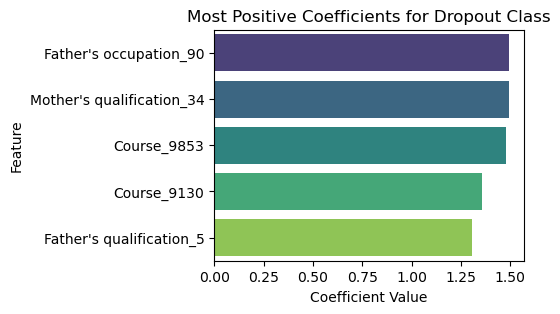

/var/folders/yq/5p00hdm16xsb4kbmhwk9rcx80000gn/T/ipykernel_16831/2049637767.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=enrolled_top_positive.head(5)['Enrolled'], y=enrolled_top_positive.head(5).index, palette='coolwarm')


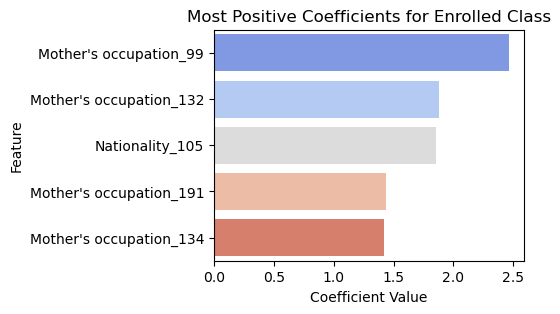

/var/folders/yq/5p00hdm16xsb4kbmhwk9rcx80000gn/T/ipykernel_16831/2049637767.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graduate_top_positive.head(5)['Graduate'], y=graduate_top_positive.head(5).index, palette='plasma')


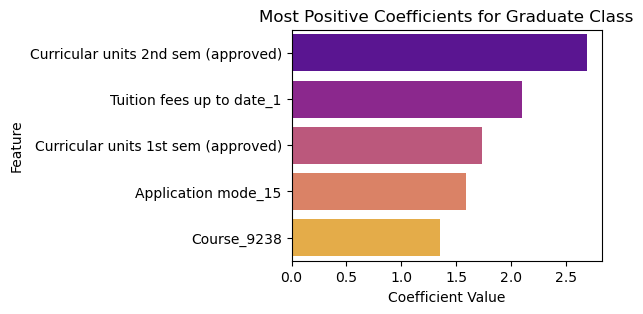

In [116]:
# dropout class feature visualization 
plt.figure(figsize=(4, 3))
#palette is randomly assigned by GPT, no idea what the color set is.
sns.barplot(x=dropout_top_positive.head(5)['Dropout'], y=dropout_top_positive.head(5).index, palette='viridis')
plt.title("Most Positive Coefficients for Dropout Class")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# enrolled class feature visualization
plt.figure(figsize=(4, 3))
#palette is randomly assigned by GPT, no idea what the color set is.
sns.barplot(x=enrolled_top_positive.head(5)['Enrolled'], y=enrolled_top_positive.head(5).index, palette='coolwarm')
plt.title("Most Positive Coefficients for Enrolled Class")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# graduate class feature visualization
plt.figure(figsize=(4, 3))
#palette is randomly assigned by GPT, no idea what the color set is.
sns.barplot(x=graduate_top_positive.head(5)['Graduate'], y=graduate_top_positive.head(5).index, palette='plasma')
plt.title("Most Positive Coefficients for Graduate Class")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


**Dropout**:
I can clearly see that the top 3 significant predictors for the dropout class are father's occupation = 90 (occupation = other situation, mother's qualification =4 (higher education = masters), and Course_9853, which I am not sure what this feature means. This seems pretty reasonable, except that it seems to suggest that a parent with a master's degree makes their child more likely to drop out. I'm not sure that makes sense given the significance of the other predictor (the father's job is different), which seems to suggest that the family background is unknown/not traditional/more likely to be poor than rich given the other occupations on the list. I am not sure how to interpret the one-hot encoded Course feature, as we do not have access to the meanings of these values. 

**Enrolled**:
Mother's occupation = 99 (blank),Mother's occupation = 132 (Technicians and professionals of intermediate level of health) and Nationality = 105 (Russian) are the top 3 significant predictors. I think this makes sense for the latter two predictors. Maybe Russian people are more likely to be studious/have a culture that upholds university study. And people from families where their parents are professionals in a well-studied industry are more likely to obtain university degrees or work towards it, as the enrolled class is doing.

**Graduate**
Curricular units 2nd sem(approved), Tuition fees up to date_1, Curricular units 1st sem (approved) and Application mode = 15 (Intn'l student) are the 4 most significant predictors in this class. This makes sense. Graduates are more likely to have higher credits approved/completed than enrollees and dropouts. They are also more likely to have higher tuition fees (because more semesters completed means more tuition). And then their being international makes sense as well; perhaps they want to make a change in the country they are coming from, for which a degree from this Portuguese university will help them do so.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Create a visualization showing the top 10 significant features (through t-tests)
**I cant create any t test visualization, just tried for 30 minutes and at this point I'm relying on ChatGPT. I'm pretty sure it's because the training data has missing values but when I account for those by dropping rows nothing is outputted for my visualizations. I can't believe this...I went to so many OH for my EDA constantly asking them if what I had done with the trainign data is enough and they're all like yes yes you're fine only spend 30 minutes on this pset anyway blah blah. And look, I think I ought to have dealt with this earlier. But I'm so frustrated at this point. The TFs were and are so unhelpful for this pset, claiming that it is the easiest one and we should focus on our projects, that they don't give any meaningful insights on how to actually do the work. Which leads me to situations like this, where I am writing this long paragraph instead of coding.**

In [117]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

**Preprocessing for Decision Trees (FROM LAB)**

Trees don't require feature scaling because they use thresholds rather than distances. But it's fine that my features are scaled, even though they don't have to be. Now I know! 

For binary categories, any encoding works equally well
For multi-class categories: One-hot encoding is preferred

Therefore, I am all set with this step as all my cateogircal variables are one-hot encoded. 

**Missing Values**: 
   I have no missing values in my dataframes so no need to take care of any of these.

**Hyperparameters**
I will decide to tune my tree's max_depth and splitting criteria, as I believe one important stopping criterion and splitting criterion is enough to build a solid Decision Tree Classifier. I will do this using the code from lab. My splitting criteria will be gini, because one of my favorite school projects in high school was calculating the gini index of countries across the globe. I also know that gini and entropy splitting produce very similar results, and after lab on Friday I feel that I can use them interchangeably. 

In [118]:
df = pd.DataFrame(columns=['criterion', 'depth', 'all_cv', 'mean_cv'])

criterion = ['gini']

first_depth = 2
final_depth = 30
step = 2

results = []
    
for max_depth in range(first_depth, final_depth+1, step):
    dt = DecisionTreeClassifier(criterion='gini' , max_depth=max_depth)
    scores = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=5, n_jobs=-1)
        
    cur_results = {'criterion': criterion,
                      'depth': max_depth,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
    results.append(cur_results)
df = pd.DataFrame(results)


In [119]:
df.head()

,criterion,depth,all_cv,mean_cv
0,[gini],2,"[0.7003012048192772, 0.7183734939759037, 0.707...",0.716101
1,[gini],4,"[0.713855421686747, 0.7439759036144579, 0.7454...",0.736289
2,[gini],6,"[0.7364457831325302, 0.7469879518072289, 0.721...",0.738098
3,[gini],8,"[0.7243975903614458, 0.733433734939759, 0.7439...",0.734479
4,[gini],10,"[0.7198795180722891, 0.7153614457831325, 0.722...",0.723029


In [120]:
mean_CV_acc_gini = df['mean_cv']


best_idx_gini = np.argmax(mean_CV_acc_gini)

best_depth_gini = df['depth'].iloc[best_idx_gini]

print('The best depth based on Gini impurity was found to be: ', best_depth_gini)


The best depth based on Gini impurity was found to be:  6


In [121]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
import numpy as np



# set categorical and quant features
categorical_features = [col for col in x_train.columns if col not in quant_list]
numerical_features = quant_list

# compute class weights code from lab 9
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train.values.ravel())

class_weights_dict = dict(zip(np.unique(y_train.values.ravel()), class_weights))

# # imputation strategy, so most frequent for categorical and median for numerical, 
# #just like the header from lab says
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', SimpleImputer(strategy='most_frequent'), categorical_features),
#         ('num', SimpleImputer(strategy='median'), numerical_features)
#     ]
# )

# instantiate pipeline
pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),  # Handle missing values
    ('classifier', DecisionTreeClassifier(
        class_weight=class_weights_dict,
        random_state=42, max_depth=best_depth_gini, criterion = 'gini'
    ))  # Decision Tree Classifier
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)




In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# fit the pipeline to the data


#don't have y_test data to calculate f1 score easiliy so must calculate it using cross validation
# cross_val_score to calculate F1 score via cross-validation

f1_scores = cross_val_score(estimator = pipeline, #pipeline is my model
                           X=x_train,
                           y=y_train,
                           cv=5, #5 fold val
                           scoring='f1_weighted', #f1 scoring
                           n_jobs=-1
                          )

model_avg_f1_score = f1_scores.mean()
print(model_avg_f1_score)




0.7059445421164894


In [123]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Dropout


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [124]:
y_pred.insert(0, 'ID', range(0, len(y_pred))) 
y_pred.rename(columns={0: 'DT_Predicted'})
y_pred.index = y_pred.index+1 

In [125]:
y_pred.head()

,ID,0
1,0,Graduate
2,1,Enrolled
3,2,Graduate
4,3,Graduate
5,4,Dropout


In [126]:
y_pred = y_pred.rename(columns={0: 'DT_Predicted'})

In [127]:
y_pred.to_csv('./submissions/submission_dt.csv', index=False)


Feature Importance & Interpretation

Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
Visualize and explain which features had the most impact.

In [128]:
#extracting the decision tree model/object, which is an attribute of my pipeline object
classifier = pipeline.named_steps['classifier']

In [139]:
gini_importance = classifier.feature_importances_
print(len(gini_importance))

222


In [130]:
#NEED THIS CODE FROM CHATGPT BC MY GINI_IMPORTANCE AND X_TRAIN WERE OF DIFFERENT SIZES, THUS CAUSING AN ERROR
# preprocessed_features = (
#     pipeline.named_steps['preprocessor']
#     .transformers_[0][1]
#     .fit_transform(x_train)
# )
# print(preprocessed_features.shape)  # Check the final feature dimensions

# Inspect preprocessed feature names
# preprocessed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

#STILL SIZE 222. SO SOMEHOW MY GINI IMPORTANCE IS CONCATENATING AN EXTRA VALUE

In [141]:
#having an issue where features and importance_df are different lenses going to debug
features = x_train.columns
# print(len(features)) #222
# print(len(gini_importance)) #223 
print(len(features) == len(gini_importance))

True


In [132]:
#gini_importance[-1:]

array([0.])

In [133]:
#gini_importance[0]

np.float64(0.0)

**Having a baffling issue where my gini_importance changes size once in a while when I run this notebook. Please run the below code if the feature and gini_importance arrays are of different length. I worked on this with two separate TFs and they could not tell me why I was getting this error, so we figured we would just do the below code based on our observations above**

In [134]:
# in case the arrays are of different length
#gini_importance = gini_importance[1:]

so gini_importance has an imaginary gini importance value for it's 0th index. Weird. 

In [142]:
#now I will make a dataframe demonstrating the feature importance. feature names will be one column
#and their associated gini importance will be the other
#first, get feature names
features = x_train.columns
#creating the dataframe 
importance_df = pd.DataFrame({'Feature Name': features, 'Gini Importance': gini_importance})
#sorting gini importance values so I want the most important at the top of the dataframe
importance_df = importance_df.sort_values(by = 'Gini Importance', ascending = False)

print(importance_df)

                               Feature Name  Gini Importance
13      Curricular units 2nd sem (approved)         0.584409
218               Tuition fees up to date_1         0.097564
6    Curricular units 1st sem (evaluations)         0.064151
5       Curricular units 1st sem (enrolled)         0.033091
11      Curricular units 2nd sem (enrolled)         0.032394
..                                      ...              ...
214                 Father's occupation_195         0.000000
216             Educational special needs_1         0.000000
219                                Gender_1         0.000000
220                    Scholarship holder_1         0.000000
221                         International_1         0.000000

[222 rows x 2 columns]


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

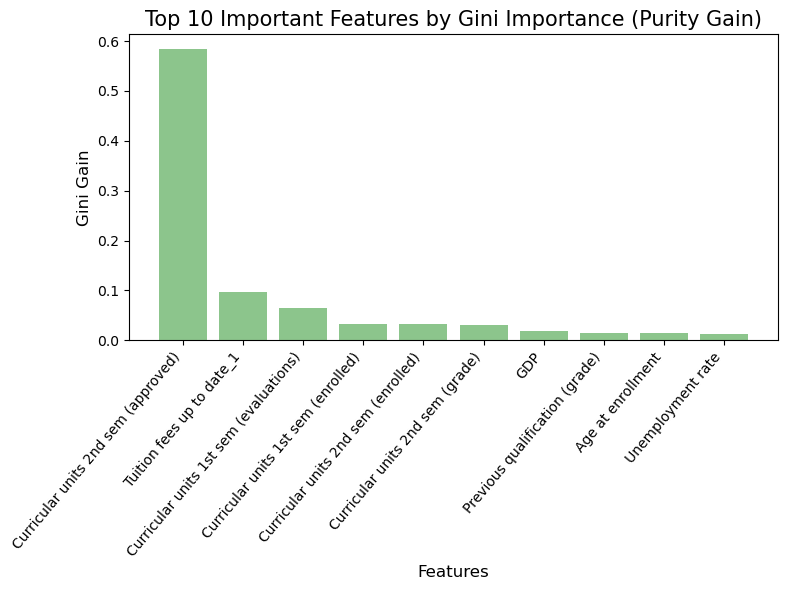

In [143]:
#I will plot the top 10 gini importance features
top10 = 10
top_gini_features = importance_df.head(top10)

plt.figure(figsize = (8,6))
plt.bar(top_gini_features['Feature Name'], top_gini_features['Gini Importance'], color = 'green', alpha = 0.45)
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Gini Gain', fontsize = 12)
plt.title('Top 10 Important Features by Gini Importance (Purity Gain)', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right')
plt.tight_layout()
# top_n = 10
# top_features = importance_df_sorted.head(top_n)
# plt.figure(figsize=(10, 6))
# plt.bar(top_features['Feature'], top_features['Importance'], color='orange')
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Importance', fontsize=12)
# plt.title(f'Top {top_n} Features by Importance', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

Based on this bar plot, it clear to see that the most significant feature is Curricular units 2nd sem (approved). I think this makes sense as to why it is such an important feature in splitting the feature space and causing the most purity gain. Students who are obtaining more units/credits are more likely to be obviously be enrolled and graduate, than dropouts, who I assume have a relatively smaller amount of approved units/credits. 

In [144]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

My custom model will be a Random Forest model, as we just learned about them today 
in class and I want to test them out.

I will take care of class imbalance by class_weight, same as I did with the decision tree.

For my Random Forest model, I will have to figure out which maximum depth of the trees is the best. Because a Single Decision tree overfits, the best gini cv values will be relatively shallow. As we saw, the maximum depth was six. However, with a random forest, they inherently prevent overfitting thus the maximum depth can be higher. Thus, I will test out what the best maximum depth is using cross validation, using the single decision tree's best depth as a starting point.

Additionally, I determined that a number of 50 trees in the ensemble is reasonable enough because my computer processing power can not handle anything above this number after testing it out. I hope you understand :(



In [145]:
y_train.values.ravel().reshape(-1,1)

array([['Graduate'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Graduate'],
       ['Dropout'],
       ['Graduate']], dtype=object)

In [146]:
from sklearn.ensemble import RandomForestClassifier
import warnings

class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes = np.unique(y_train),
                                     y=y_train.values.ravel())

class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Example: Using best_depth_gini from a single tree as a starting point
param_grid = {
    'max_depth': [best_depth_gini, best_depth_gini + 5, best_depth_gini + 10, None],  # Test deeper trees
    'n_estimators': [50],  # of trees
    'criterion': ['gini'],  # gini impurity as splitting criterion
}

rf_model = RandomForestClassifier(class_weight = class_weights_dict,
                                  random_state=42)

# Suppress warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_weighted',
                           n_jobs=-1)

    grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
best_f1_score = grid_search.best_score_

print(best_parameters)
print(best_f1_score)
                       

/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/b

{'criterion': 'gini', 'max_depth': np.int64(16), 'n_estimators': 50}
0.7589166851037012


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

So I can see that the best depth of my random forest model is 16 and the associated F1 score is 0.758 with tuning this specific hyperparameter. 

In [159]:
rf_model = RandomForestClassifier(n_estimators=50,
                                 class_weight = class_weights_dict,
                                 random_state=42,
                                 max_depth = 16,
                                 criterion = 'gini',
                     )

rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)



/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [160]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Graduate


In [161]:
y_pred.insert(0, 'ID', range(0, len(y_pred))) 

In [162]:

# y_pred.rename(columns={0: 'Custom_Predicted'})
y_pred.index = y_pred.index+1 
y_pred = y_pred.rename(columns={0: 'Custom_Predicted'})
y_pred.to_csv('./submissions/submission_custom.csv', index=False)


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [163]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

I will compare my models on the F1 score, as that is an applicable metric across anytype of model. 

In [164]:
#F1 score of Logistic Regression model
# #I want my ovr model to be the best estimator attribute of the grid
# best_model = grid_search.best_estimator_
f1_scores = cross_val_score(estimator = best_model,
                            X=x_train,
                            y=y_train,
                            cv=5,
                            scoring = 'f1_weighted',
                            n_jobs=-1
                           )
lr_f1_score = f1_scores.mean()
print(f'The OvR F1 Score is {lr_f1_score}')

The OvR F1 Score is 0.764376916273202


In [165]:
# your code here
#F1 score of Decision Tree model
f1_scores = cross_val_score(estimator = pipeline, #pipeline is my model
                           X=x_train,
                           y=y_train,
                           cv=5, #5 fold val
                           scoring='f1_weighted', #f1 scoring
                           n_jobs=-1
                          )
dt_score = f1_scores.mean()

print(f'The Decision Tree F1 Score is {dt_score}')

The Decision Tree F1 Score is 0.7059445421164894


In [166]:
#F1 score of Random Forest model
f1_scores = cross_val_score(estimator = rf_model,
                            X=x_train,
                            y=y_train,
                            cv=5,
                            scoring='f1_weighted',
                            n_jobs=-1
                           )
rf_score = f1_scores.mean()
print(f'The Random Forest F1 Score is {rf_score}')

/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/b

The Random Forest F1 Score is 0.7589166851037012


I can see that, according to the F1 score, my OvR model is the most accurate. I believe the F1 Score is the most useful metric to determine model performance because it is applicable to all the models in this notebook, as it is based on both precision and recall.

Anyway, this is interesting! Maybe the decision boundaries between classes across the feature space are more likely to be linear than complex! 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I'm assuming by discussing strengths and weaknesses of each approach you mean discuss the strengths and weaknesses of the model's predicting ability. That is the question I will answer. 

**OvR**

Advantages: Easy to interpret and straightforward to compute. The notes from lecture state that sklearn normalizes the output of each of the models created for our classes (in this case 3) when predicting probabilities. Additionally, OvR is parametric thus there are beta coefficients for each feature showcasing how correlated they are with each class. My OvR model can give me the estimated probability of graduating given certain features and can also give me estimation for how each feature increases the log odds, or multiplicative odds, if the feature is present in determining classification.

Disadvantages: Assumes a linear decision boundary between classes, which as we've seen, is not necessarily the case. When the decision boundaries cannot easily be described by a single equation logistic regression is tough. 

**Decision Trees**

Advantages: Allows for complex decision boundaries, is also easy to interpret, and is efficient to compute. To classify or predict an observation in our dataset, we just traverse the tree and boom, it is classified or predicted. 

Disadvantages: A single decision tree is likely to lead to overfitting because to capture a complex decision boundary, we must do axis-aligned splits. As a result, we need to use a deep tree. Deep trees have high variance and are prone to overfitting. Therefore, decision tree models underperform in comparison to other classification models, which we have seen in this homework is the case. 

**Random Forest**

Advantages: Random forests allow for complex decision boundaries, are easy to interpret (because they can also return probabilities) and are reasonably efficient to compute. Random Forests also have an ensemble learning method, which prevents overfitting and high model variance. Additionally, increasing the number of trees in the ensemble does not generally increase overfitting so there is much greater clarity given to the final prediction. 

Disadvantages: When the number of predictors is large but the number of relevant predictors is small, random forests cxan perform poorly. This is because in each split, the chances of selecting a relevant predictor will be low and hence most trees in the ensemble will be weak models.



<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [155]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

**These models could be used by educational institution to improve student outcomes in a plethora of ways.**

For my decision tree and random forest model, the educational institution could traverse down these classifiers with actual inputs from a student (such as their father's occupation, or grades, application order, etc). They could predict the class of the student, whether they would graduate, still be enrolled, or dropout given this traversal of the tree. This would allow them to make an informed decision on how to best help the student, given that they have this prediction of what will happen to said student based on the student's current experience. 

For the OvR model, the educational institution has obtained beta coefficients $B_i$ associated with each feature such that $e^{B_i}$ details the change in multiplicative odds of being a certain class given the student has that feature. So, the university could see if they were more at risk of being a dropout, or more likely to graduate or be enrolled given they have a feature. 

**Some aspects that were tough was my random**



<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [167]:
print(notebook_start)

1731986953.8093572


In [156]:
hours_spent_on_hw = 

In [157]:
grader.check("wrapup")

wrapup results:
    wrapup - 1 result:
        ❌ Test case failed
        Trying:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Expecting nothing
        **********************************************************************
        Line 1, in wrapup 0
        Failed example:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/zacharysardi-santos/micromamba/envs/cs109a/lib/python3.12/doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest wrapup 0[0]>", line 1, in <module>
                assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
                       ^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [158]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 1394.40 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
